<a href="https://colab.research.google.com/github/Tracyls/Sales_Performance/blob/main/rc_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.columns = df.columns.str.strip().str.lower()
df['orderdate'] = pd.to_datetime(df['orderdate'])

In [ ]:
df_cleaned=df.dropna(subset=['sales'])
df_cleaned=df_cleaned.drop_duplicates()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ordernumber       2823 non-null   int64         
 1   quantityordered   2823 non-null   int64         
 2   priceeach         2823 non-null   float64       
 3   orderlinenumber   2823 non-null   int64         
 4   sales             2823 non-null   float64       
 5   orderdate         2823 non-null   datetime64[ns]
 6   status            2823 non-null   object        
 7   qtr_id            2823 non-null   int64         
 8   month_id          2823 non-null   int64         
 9   year_id           2823 non-null   int64         
 10  productline       2823 non-null   object        
 11  msrp              2823 non-null   int64         
 12  productcode       2823 non-null   object        
 13  customername      2823 non-null   object        
 14  phone             2823 n

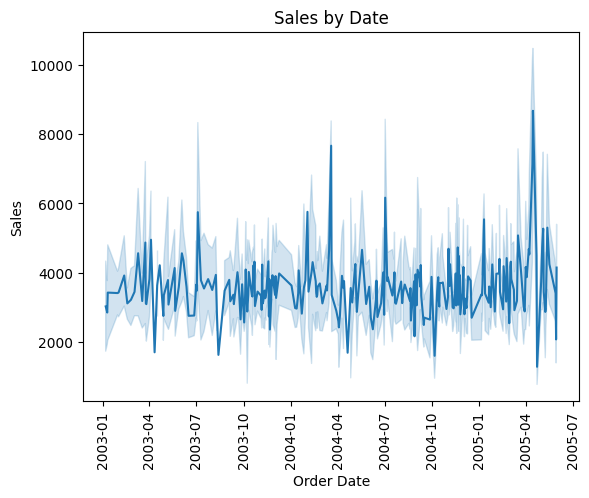

In [ ]:

sns.lineplot(x='orderdate', y='sales', data=df_cleaned)
plt.xticks(rotation=90)
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales by Date')
plt.show()

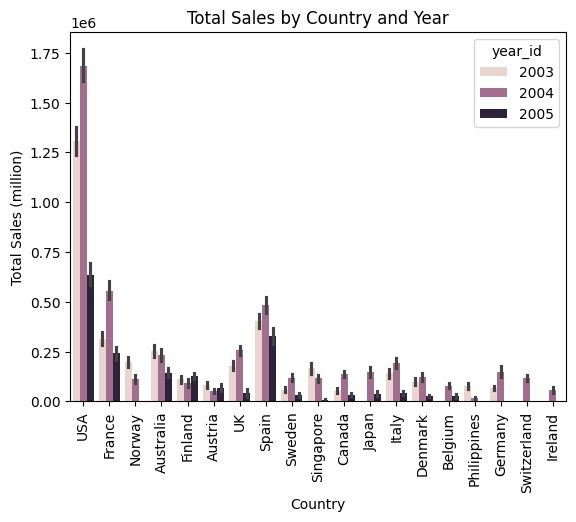

In [ ]:
sns.barplot(data=df, x="country", y="sales", hue="year_id", estimator=np.sum)
plt.xticks(rotation=90)
plt.title("Total Sales by Country and Year")
plt.xlabel("Country")
plt.ylabel("Total Sales (million)")
plt.show()

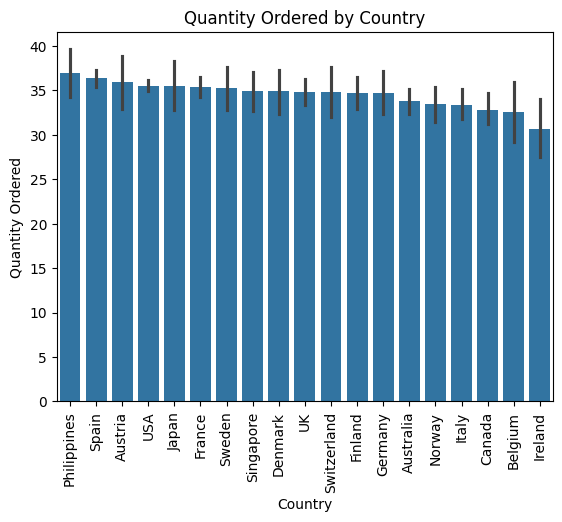

In [ ]:
qnty_order = df.groupby('country')['quantityordered'].mean().sort_values(ascending=False).index
sns.barplot(x='country', y='quantityordered', data=df_cleaned, order=qnty_order)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Country')
plt.show()

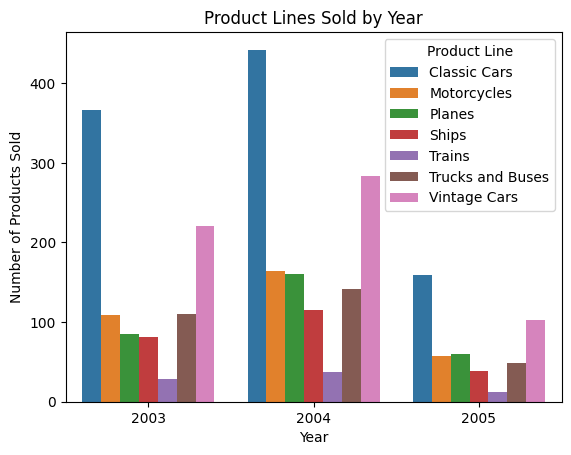

In [ ]:
total_product_counts = df_cleaned.groupby(['year_id', 'productline']).size().reset_index(name='count')
sns.barplot(data=total_product_counts, x='year_id', y='count', hue='productline')
plt.title('Product Lines Sold by Year')
plt.xlabel('Year')
plt.ylabel('Number of Products Sold')
plt.legend(title='Product Line')
plt.show()

Revenue by Product Line:
        productline       sales
0      Classic Cars  3919615.66
1      Vintage Cars  1903150.84
2       Motorcycles  1166388.34
3  Trucks and Buses  1127789.84
4            Planes   975003.57
5             Ships   714437.13
6            Trains   226243.47


/tmp/ipython-input-3839804906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales', y='productline', data=revenue_by_productline, palette='magma')


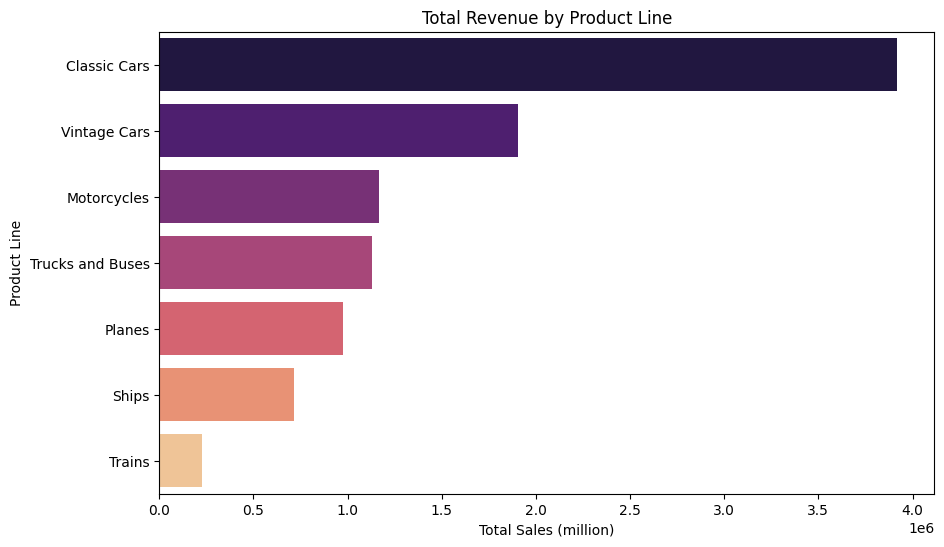

In [ ]:
revenue_by_productline = df_cleaned.groupby('productline')['sales'].sum().sort_values(ascending=False).reset_index()
print("Revenue by Product Line:")
print(revenue_by_productline)

plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='productline', data=revenue_by_productline, palette='magma')
plt.title('Total Revenue by Product Line')
plt.xlabel('Total Sales (million)')
plt.ylabel('Product Line')
plt.show()

## Identify Underperforming Product Lines

Pinpoint product lines that generate the least revenue, as these might represent a financial risk or require strategic re-evaluation.


In [ ]:
print(revenue_by_productline)

        productline       sales
0      Classic Cars  3919615.66
1      Vintage Cars  1903150.84
2       Motorcycles  1166388.34
3  Trucks and Buses  1127789.84
4            Planes   975003.57
5             Ships   714437.13
6            Trains   226243.47



## Identify Underperforming Countries

Identify countries with the lowest total sales to understand geographical areas that might need strategic attention or improved marketing efforts.

In [ ]:
sales_by_country = df_cleaned.groupby('country')['sales'].sum().sort_values(ascending=True).reset_index()
print("Total Sales by Country (Lowest to Highest):")
print(sales_by_country)

Total Sales by Country (Lowest to Highest):
        country       sales
0       Ireland    57756.43
1   Philippines    94015.73
2       Belgium   108412.62
3   Switzerland   117713.56
4         Japan   188167.81
5       Austria   202062.53
6        Sweden   210014.21
7       Germany   220472.09
8        Canada   224078.56
9       Denmark   245637.15
10    Singapore   288488.41
11       Norway   307463.70
12      Finland   329581.91
13        Italy   374674.31
14           UK   478880.46
15    Australia   630623.10
16       France  1110916.52
17        Spain  1215686.92
18          USA  3627982.83


Based on the `sales_by_country` DataFrame, 'Ireland', 'Philippines', and 'Belgium' are identified as the countries with the lowest total sales, indicating potential areas for strategic re-evaluation or targeted marketing efforts. In contrast, 'USA', 'Spain', and 'France' are the top-performing countries in terms of sales.

## Analyze Sales Trends Over Time

Analyze the sales trends over time to identify any decline or high volatility, which can inform inventory management and marketing strategies.

In [ ]:
sales_by_year = df_cleaned.groupby('year_id')['sales'].sum().reset_index()
print("Total Sales by Year:")
print(sales_by_year)


Total Sales by Year:
   year_id       sales
0     2003  3516979.54
1     2004  4724162.60
2     2005  1791486.71


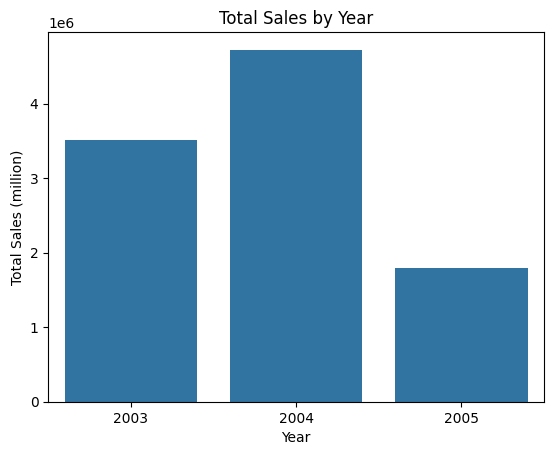

In [ ]:
sns.barplot(x='year_id', y='sales', data=sales_by_year)
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (million)')
plt.show()

Based on the line plot of `Total Sales by Year`, there is a clear sales decline from 2004 to 2005. Sales peaked in 2004 at approximately 4.7 million and then dropped significantly to about 1.8 million in 2005. This indicates a high volatility and a concerning downward trend in the most recent year, which requires further investigation.

## Calculate Average Order Value (AOV)

Calculate the Average Order Value (AOV) to understand transaction efficiency and the typical revenue generated per order.

In [ ]:
total_sales = df_cleaned['sales'].sum()
print(f"Total Sales: {total_sales:,.2f}")

Total Sales: 10,032,628.85


In [ ]:
unique_orders = df_cleaned['ordernumber'].nunique()
print(f"Number of Unique Orders: {unique_orders}")

Number of Unique Orders: 307


In [ ]:
aov = total_sales / unique_orders
print(f"Average Order Value (AOV): {aov:,.2f}")

Average Order Value (AOV): 32,679.57


## Summary:

### Q&A
1.  **Which product lines have the lowest total sales?**
    'Trains' and 'Ships' are the product lines with the lowest total sales, amounting to \$226,243.47 and \$714,437.13, respectively.
2.  **Which countries have the lowest total sales?**
    'Ireland' (\$57,756.43), 'Philippines' (\$94,015.73), and 'Belgium' (\$108,412.62) have the lowest total sales.
3.  **What is the sales trend over time, and is there any decline or high volatility?**
    There is a clear and significant sales decline from 2004 to 2005. Sales peaked in 2004 at approximately \$4,724,162.60 and then dropped by over 50% to about \$1,791,486.71 in 2005, indicating high volatility and a concerning downward trend.
4.  **What is the Average Order Value (AOV)?**
    The Average Order Value (AOV) is \$32,679.57.

### Data Analysis Key Findings
*   'Trains' (\$226,243.47) and 'Ships' (\$714,437.13) are the product lines with the lowest total sales, significantly underperforming compared to 'Classic Cars' (\$3,919,615.66) and 'Vintage Cars' (\$1,903,150.84).
*   Geographically, 'Ireland' (\$57,756.43), 'Philippines' (\$94,015.73), and 'Belgium' (\$108,412.62) are the countries with the lowest sales, contrasting sharply with top performers like 'USA' (\$3,627,982.83).
*   Sales exhibited a severe decline of more than 50% from 2004 (\$4,724,162.60) to 2005 (\$1,791,486.71), highlighting significant volatility and a concerning downward trend in the most recent year.
*   The calculated Average Order Value (AOV) is \$32,679.57, derived from total sales of \$10,032,628.85 across 307 unique orders.

### Insights or Next Steps
*   Investigate the specific reasons for the drastic sales decline from 2004 to 2005 to formulate effective recovery strategies.
*   Develop targeted marketing campaigns or re-evaluate product offerings for underperforming product lines ('Trains', 'Ships') and countries ('Ireland', 'Philippines', 'Belgium') to improve revenue generation in these areas.
